In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import sympy
import qsymm

s0 = np.eye(2)
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])

In [12]:
# D4h group: 2C4, C2, 2C2', 2C2'', i, 2S4, σh, 2σv, 2σd
# 2D version: 2C4, C2, 2σv, 2σd = C4v
# generators: C4, My + TR

TR = qsymm.time_reversal(2, U=np.eye(4))

U = np.array([[0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1],
              [1, 0, 0, 0]])
C4 = qsymm.rotation(1/4, U=U)

U = np.array([[0, 0, 1, 0],
              [0, 1, 0, 0],
              [1, 0, 0, 0],
              [0, 0, 0, 1]])
My = qsymm.mirror([0,1], U=U)

symmetries = [C4, My, TR]

norbs = [('A', 1),
         ('B', 1),
         ('C', 1),
         ('D', 1)]
hopping_vectors = [# within unit cell
                   ('A', 'B', [ 1, -1]),
                   ('B', 'C', [-1, -1]),
                   ('C', 'D', [-1,  1]),
                   ('D', 'A', [ 1,  1]),
                   # between unit cells
                   ('A', 'C', [ 0, 1]),
                   ('B', 'D', [ 1, 0]),
                   ]

family = qsymm.bloch_family(hopping_vectors, symmetries, norbs, bloch_model=True)
H = qsymm.hamiltonian_generator.hamiltonian_from_family(family)
H

Matrix([
[                      c0, c2*e**(I*k_x)/e**(I*k_y),              c1*e**(I*k_y), c2/(e**(I*k_x)*e**(I*k_y))],
[c2*e**(I*k_y)/e**(I*k_x),                       c0, c2/(e**(I*k_x)*e**(I*k_y)),              c1*e**(I*k_x)],
[           c1/e**(I*k_y), c2*e**(I*k_x)*e**(I*k_y),                         c0,   c2*e**(I*k_y)/e**(I*k_x)],
[c2*e**(I*k_x)*e**(I*k_y),            c1/e**(I*k_x),   c2*e**(I*k_x)/e**(I*k_y),                         c0]])

# Check permutations

In [17]:
HN = sympy.lambdify(['k_x', 'k_y'], H)
H0 = HN(0,0)
print(H0)

[[c0 c2 c1 c2]
 [c2 c0 c2 c1]
 [c1 c2 c0 c2]
 [c2 c1 c2 c0]]


In [29]:
permutation = [1, 0, 2, 3] # site-permutation not space group
# permutation = [2, 1, 0, 3] # My
# permutation = [1, 0, 3, 2] # Md
HP = HN(0,0)[permutation,:][:,permutation]
print(HP)
print('Valid permutation:', np.all(HP == H0))

[[c0 c2 c2 c1]
 [c2 c0 c1 c2]
 [c2 c1 c0 c2]
 [c1 c2 c2 c0]]
Valid permutation: False


# Plot bands

In [279]:
Hk = sympy.lambdify(['k_x', 'k_y', 'c0', 'c1', 'c2', f'e={np.e}'], H)

DK = 2*np.pi/6
kpath = np.array([[0,0], [0,1], [1,1], [0,0]])*DK # Γ-X-M-Γ
npts = 20
klabels = ['Γ', 'X', 'M', 'Γ']
kticks = [0, npts-1, 2*(npts-1), 3*(npts-1)]

In [280]:
kxs = []
kys = []
for i in range(len(kpath)-1):
    kxs += list(np.linspace(kpath[i,0], kpath[i+1,0], num=npts)[:-1])
    kys += list(np.linspace(kpath[i,1], kpath[i+1,1], num=npts)[:-1])
kxs += [kpath[-1,0]]
kys += [kpath[-1,1]]
kxs = np.array(kxs).flatten()
kys = np.array(kys).flatten()

kpts = np.vstack([kxs, kys]).T

In [287]:
evals = []
for k in kpts:
    evals.append(np.linalg.eigvalsh(Hk(*k, 0, -1, -1)))
evals = np.array(evals)

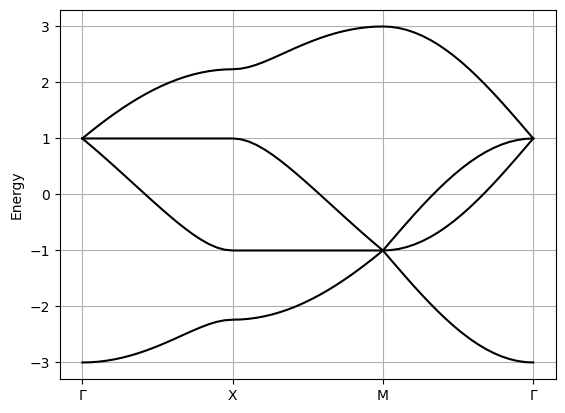

In [289]:
plt.plot(evals, c='black')
plt.ylabel('Energy')
plt.xticks(kticks, klabels)
plt.grid()
plt.show()